# Michael comments
- if somebody joins relay, how much time is between joining and the next product they use? 
- - hypothesis is that they accidentally joined relay
- - what's the median time between product adoption? 

- Predictive modeling
- - start slow, (what we have is a markov chain), people move from one state to another. 
- - - what's the probability of moving from one state to another?
- - - markov chain is a good place to start (simplest model)
- - - then we could add more complexity (user features)

- Alternatively...
- - first to second product, or third product (ignore fourth, fifth, etc)
- Classification approach
- - what's the difference between users that have product 

- Don't worry about going back to the beginning and getting more data! (FOR NOW)


#### Questions we're answering
- what's the ideal onboarding flow?




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from tqdm import tqdm

import plotly
# from chart_studio import plotly


In [2]:
dataframe = pd.read_csv('big_data.csv')

/var/folders/kc/jdw9593x3ksdmnhyd571zm440000gp/T/ipykernel_81329/1281625065.py:1: DtypeWarning: Columns (23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv('big_data.csv')


In [3]:
pd.set_option('display.max_columns', None)
dataframe.head(20)

,ROW_NUM,USER_ID,INV_OPEN_DATE,INV_NUM_ACCOUNTS,INV_ACC_BAL,MONEY_ACCOUNT_OPEN_DATE,MONEY_ACCOUNT_STATUS,FICO,MONEY_DATA_UPDATE_DATE,MONEY_TOTAL_BALANCE,LAST_PAYMENT_DATE,ORIGINATION_DATE,PRINCIPAL,SL_ACTIVE_IND,PL_ACTIVE_IND,MORTGAGE_ACTIVE_IND,BANKING_ACTIVE_IND,INVEST_ACTIVE_IND,CC_ACTIVE_IND,CSM_ACTIVE_IND,ACTIVE,TOTAL_RECENCY_DAYS,RELAY_ORIGINAL_DATE,ONBOARDING_SUCCESS_DATE,FIRST_TRANSACTION_DATE,CREDIT_LINE
0,1.0,19608976.0,NaN,NaN,NaN,2021-08-09,Active,524.0,2023-02-21,10.87,NaN,NaN,NaN,False,False,False,True,False,False,True,True,100.0,2022-11-14,NaN,NaN,NaN
1,1.0,19608987.0,2021-08-09,1.0,1859.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,19608991.0,NaN,NaN,NaN,2021-08-09,Active,633.0,2023-02-21,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,19608994.0,2021-08-09,1.0,2264.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,19609000.0,NaN,NaN,NaN,2022-06-15,Active,NaN,2023-02-21,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,19609001.0,2021-08-09,1.0,3086.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,19609007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,True,True,694.0,2021-03-30,NaN,NaN,NaN
7,1.0,19609012.0,2021-10-05,3.0,369.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,True,False,True,True,131.0,2022-10-14,NaN,NaN,NaN
8,1.0,19609015.0,2021-08-09,2.0,3555.45,2021-08-14,Active,606.0,2023-02-21,0.90,NaN,NaN,NaN,False,False,False,True,True,False,True,True,128.0,2022-10-17,NaN,NaN,NaN
9,1.0,19609028.0,NaN,NaN,NaN,2021-08-09,Active,NaN,2023-02-21,2.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(len(dataframe))

3318129


In [5]:
#get the number of unique user_ids
print(len(dataframe['USER_ID'].unique()))

3318129


In [6]:
percent_with_invest = 1 - (dataframe['INV_OPEN_DATE'].isna().sum()/len(dataframe))

print(f"{percent_with_invest}% of people use Invest")

percent_with_money = 1 - (dataframe['MONEY_ACCOUNT_OPEN_DATE'].isna().sum()/len(dataframe))

print(f"{percent_with_money}% of people use Money")

percent_with_relay = 1 - (dataframe['RELAY_ORIGINAL_DATE'].isna().sum()/len(dataframe))

print(f"{percent_with_relay}% of people use Relay")

percent_with_a_loan = 1 - (dataframe['ORIGINATION_DATE'].isna().sum()/len(dataframe))

print(f"{percent_with_a_loan}% of people have a Loan")

percent_with_credit = 1 - (dataframe['ONBOARDING_SUCCESS_DATE'].isna().sum()/len(dataframe))

print(f"{percent_with_credit}% of people have a Credit Card")


print(percent_with_invest + percent_with_money + percent_with_relay + percent_with_a_loan)

0.3242306130955126% of people use Invest
0.28383676463452745% of people use Money
0.5499014655548353% of people use Relay
0.223584737061157% of people have a Loan
0.04378069689273689% of people have a Credit Card
1.3815535803460324


In [8]:
#create columns that show if a person uses a product
dataframe["uses_invest"] = ~dataframe['INV_OPEN_DATE'].isna() 
dataframe["uses_money"] = ~dataframe['MONEY_ACCOUNT_OPEN_DATE'].isna()
dataframe["uses_relay"] = ~dataframe['RELAY_ORIGINAL_DATE'].isna() 
dataframe["uses_loan"] = ~dataframe['ORIGINATION_DATE'].isna()
dataframe["uses_credit"] = ~dataframe['ONBOARDING_SUCCESS_DATE'].isna()

#create column that shows how many products a person uses
dataframe["num_products"] = (dataframe[['uses_invest', 'uses_money', 'uses_relay', 'uses_loan', 'uses_credit']] == True).sum(axis=1)

# create a column that shows how long a person has used a product. If they have never used a product, it will be NaN

dataframe['date_of_creating_new_columns'] = pd.to_datetime('today').date()

dataframe['INV_OPEN_DATE'] = pd.to_datetime(dataframe['INV_OPEN_DATE']).dt.date
dataframe['days_with_invest'] = (dataframe['date_of_creating_new_columns'] - dataframe['INV_OPEN_DATE']).dt.days

dataframe['MONEY_ACCOUNT_OPEN_DATE'] = pd.to_datetime(dataframe['MONEY_ACCOUNT_OPEN_DATE']).dt.date
dataframe['days_with_money'] = (dataframe['date_of_creating_new_columns'] - dataframe['MONEY_ACCOUNT_OPEN_DATE']).dt.days

dataframe['RELAY_ORIGINAL_DATE'] = pd.to_datetime(dataframe['RELAY_ORIGINAL_DATE']).dt.date
dataframe['days_with_relay'] = (dataframe['date_of_creating_new_columns'] - dataframe['RELAY_ORIGINAL_DATE']).dt.days

dataframe['ORIGINATION_DATE'] = pd.to_datetime(dataframe['ORIGINATION_DATE']).dt.date
dataframe['days_with_loan'] = (dataframe['date_of_creating_new_columns'] - dataframe['ORIGINATION_DATE']).dt.days

dataframe['ONBOARDING_SUCCESS_DATE'] = pd.to_datetime(dataframe['ONBOARDING_SUCCESS_DATE']).dt.date
dataframe['days_with_credit'] = (dataframe['date_of_creating_new_columns'] - dataframe['ONBOARDING_SUCCESS_DATE']).dt.days




<AxesSubplot: >

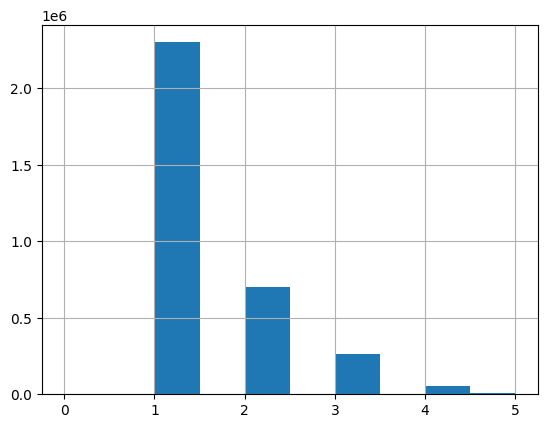

In [10]:
dataframe['num_products'].hist()

<AxesSubplot: >

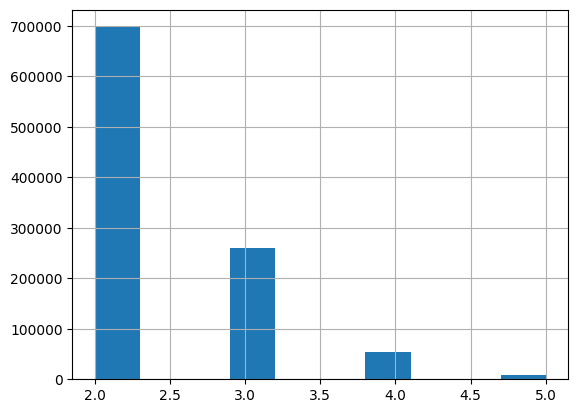

In [11]:
dataframe[dataframe['num_products'] > 1]['num_products'].hist()

# Understanding the xbuy journey


# Sankey diagram? More like JANKEY diagram amirite?

In [12]:
def convert_tuple_to_string(tup):
    str = ''
    for item in range(len(tup)):
        str = str + tup[item]
        if item < len(tup) - 1:
            str = str + '_'
    return str
    


In [22]:
products = ['relay', 'money', 'invest', 'loan', 'credit']

#permute the products
product_permutations_5 = list(itertools.permutations(products, 5))
product_permutations_4 = list(itertools.permutations(products, 4))
product_permutations_3 = list(itertools.permutations(products, 3))
product_permutations_2 = list(itertools.permutations(products, 2))
product_permutations_1 = list(itertools.permutations(products, 1))

product_permutations = product_permutations_5 + product_permutations_4 + product_permutations_3 + product_permutations_2 + product_permutations_1

#create a dataframe that will have 5 columns: lvl1, lvl2, lvl3, lvl4, and count
product_permutations_df = pd.DataFrame(columns=['lvl1', 'lvl2', 'lvl3', 'lvl4', 'lvl5', 'count'])
#fill the dataframe with the product permutations
for i in range(len(product_permutations)):
    for j in range(len(product_permutations[i])):
        product_permutations_df.loc[i, f'lvl{j+1}'] = convert_tuple_to_string(product_permutations[i][:j+1])

product_permutations_df['count'] = 0

product_permutations_df

,lvl1,lvl2,lvl3,lvl4,lvl5,count
0,relay,relay_money,relay_money_invest,relay_money_invest_loan,relay_money_invest_loan_credit,0
1,relay,relay_money,relay_money_invest,relay_money_invest_credit,relay_money_invest_credit_loan,0
2,relay,relay_money,relay_money_loan,relay_money_loan_invest,relay_money_loan_invest_credit,0
3,relay,relay_money,relay_money_loan,relay_money_loan_credit,relay_money_loan_credit_invest,0
4,relay,relay_money,relay_money_credit,relay_money_credit_invest,relay_money_credit_invest_loan,0
...,...,...,...,...,...,...
320,relay,NaN,NaN,NaN,NaN,0
321,money,NaN,NaN,NaN,NaN,0
322,invest,NaN,NaN,NaN,NaN,0
323,loan,NaN,NaN,NaN,NaN,0


In [23]:
#last populated column is the value held in the last column that has a value in it, with the options being lvl1, lvl2, lvl3, and lvl4
# product_permutations_df['last_populated_column'] = product_permutations_df['lvl4'].fillna(product_permutations_df['lvl3'].fillna(product_permutations_df['lvl2'].fillna(product_permutations_df['lvl1'])))
product_permutations_df['last_populated_column'] = product_permutations_df['lvl5'].fillna(product_permutations_df['lvl4'].fillna(product_permutations_df['lvl3'].fillna(product_permutations_df['lvl2'].fillna(product_permutations_df['lvl1']))))
last_populated_columns_dict = product_permutations_df.set_index('last_populated_column')['count'].to_dict()

In [24]:
last_populated_columns_dict

{'relay_money_invest_loan_credit': 0,
 'relay_money_invest_credit_loan': 0,
 'relay_money_loan_invest_credit': 0,
 'relay_money_loan_credit_invest': 0,
 'relay_money_credit_invest_loan': 0,
 'relay_money_credit_loan_invest': 0,
 'relay_invest_money_loan_credit': 0,
 'relay_invest_money_credit_loan': 0,
 'relay_invest_loan_money_credit': 0,
 'relay_invest_loan_credit_money': 0,
 'relay_invest_credit_money_loan': 0,
 'relay_invest_credit_loan_money': 0,
 'relay_loan_money_invest_credit': 0,
 'relay_loan_money_credit_invest': 0,
 'relay_loan_invest_money_credit': 0,
 'relay_loan_invest_credit_money': 0,
 'relay_loan_credit_money_invest': 0,
 'relay_loan_credit_invest_money': 0,
 'relay_credit_money_invest_loan': 0,
 'relay_credit_money_loan_invest': 0,
 'relay_credit_invest_money_loan': 0,
 'relay_credit_invest_loan_money': 0,
 'relay_credit_loan_money_invest': 0,
 'relay_credit_loan_invest_money': 0,
 'money_relay_invest_loan_credit': 0,
 'money_relay_invest_credit_loan': 0,
 'money_rela

In [25]:
#go through the dataframe and create the product permutations for each person
# the permutation is the order in which they used the products
# for example, a user with data like this:
# days_with_relay: 100
# days_with_money: NaN
# days_with_invest: 300
# days_with_loan: NaN
# would have a permutation of 'invest_relay' because they used invest first and then relay

for i in tqdm(range(len(dataframe))):
    #create a list of the products that the user has
    products = []
    if dataframe.loc[i, 'uses_relay'] == True:
        products.append('relay')
    if dataframe.loc[i, 'uses_money'] == True:
        products.append('money')
    if dataframe.loc[i, 'uses_invest'] == True:
        products.append('invest')
    if dataframe.loc[i, 'uses_loan'] == True:
        products.append('loan')
    if dataframe.loc[i, 'uses_credit'] == True:
        products.append('credit')
        
    #sort the list of products by the number of days the user has used the product
    products.sort(key=lambda x: dataframe.loc[i, f'days_with_{x}'])
    #convert the list of products to a string
    product_permutation = convert_tuple_to_string(tuple(products))
    #increment the count of the product permutation
    if len(products) > 0: 
        last_populated_columns_dict[product_permutation] += 1


100%|██████████| 3318129/3318129 [03:49<00:00, 14482.23it/s]


In [26]:
#populate the dataframe with the counts
for i in range(len(product_permutations_df)):
    product_permutations_df.loc[i, 'count'] = last_populated_columns_dict[product_permutations_df.loc[i, 'last_populated_column']]

#drop the last_populated_column column
product_permutations_df = product_permutations_df.drop(columns=['last_populated_column'])


In [27]:
product_permutations_df['lvl0'] = 'all'
#reindex the dataframe so the columns are in the correct order
product_permutations_df = product_permutations_df.reindex(columns=['lvl0', 'lvl1', 'lvl2', 'lvl3', 'lvl4', 'count'])

In [28]:
#save product_permutations_df to a csv file
product_permutations_df.to_csv('product_permutations.csv')


In [29]:
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

In [32]:
fig = genSankey(product_permutations_df,cat_cols=['lvl0','lvl1','lvl2','lvl3','lvl4'],value_cols='count',title='xbuy visualized')
plotly.offline.plot(fig, validate=False)

'temp-plot.html'